In [1]:
import pandas as pd #for data manipulation and analysis
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
data = pd.read_csv("C:/Users/LENOVO/Downloads/archive_5/drugsComTrain_raw.csv")

In [3]:
print("Shape of training dataset:", data.shape)
data # Display the entire DataFrame

Shape of training dataset: (161297, 7)


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


In [4]:
# Select only rows where the condition is one of the specified four conditions
data = data[data['condition'].isin(['Depression', 'ADHD', 'Bipolar Disorde', 'Anxiety'])]

# Display the selected subset of data
data

,uniqueID,drugName,condition,review,rating,date,usefulCount
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
11,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,9-Mar-17,54
18,212077,Lamotrigine,Bipolar Disorde,"""I&#039;ve been on every medicine under the su...",10,9-Nov-14,18
27,78563,Daytrana,ADHD,"""Hi all, My son who is 12 was diagnosed when h...",10,12-Jan-17,11
...,...,...,...,...,...,...,...
161270,183202,Cymbalta,Anxiety,"""I have been taking Cymbalta for 15 months now...",9,10-Jun-13,89
161276,176146,Lorazepam,Anxiety,"""About 4 years ago I started having early-morn...",8,21-Nov-17,0
161283,228492,Geodon,Bipolar Disorde,"""I was in a very bad place at the time I start...",3,25-Jul-16,5
161286,93069,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2,17-Jul-16,33


# Exploratory Data Analysis

In [5]:
data.describe()

,uniqueID,rating,usefulCount
count,22580.000000,22580.000000,22580.000000
mean,131529.035297,7.301683,45.800620
std,63973.506898,3.065193,50.009914
min,870.000000,1.000000,0.000000
25%,83212.500000,6.000000,16.000000
50%,140936.500000,9.000000,31.000000
75%,183593.500000,10.000000,59.000000
max,232225.000000,10.000000,1291.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22580 entries, 1 to 161287
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     22580 non-null  int64 
 1   drugName     22580 non-null  object
 2   condition    22580 non-null  object
 3   review       22580 non-null  object
 4   rating       22580 non-null  int64 
 5   date         22580 non-null  object
 6   usefulCount  22580 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.4+ MB


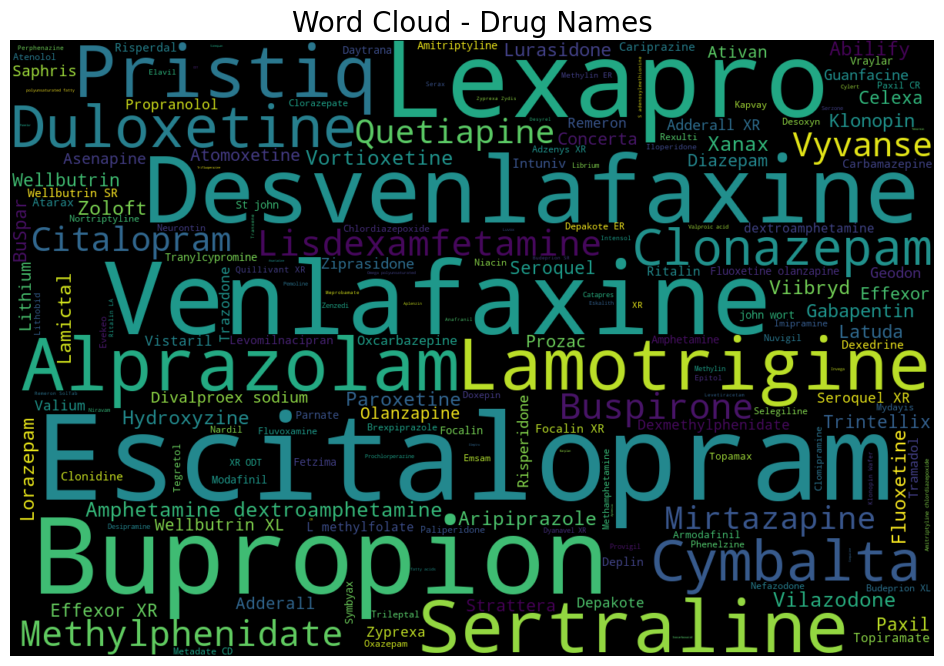

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Define stopwords
stopwords = set(STOPWORDS)

# Generate word cloud for drug names
wordcloud = WordCloud(stopwords=stopwords, width=1200, height=800).generate(' '.join(data['drugName']))

# Set plot size
plt.rcParams['figure.figsize'] = (12, 8)

# Set title and display the word cloud
plt.title('Word Cloud - Drug Names', fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

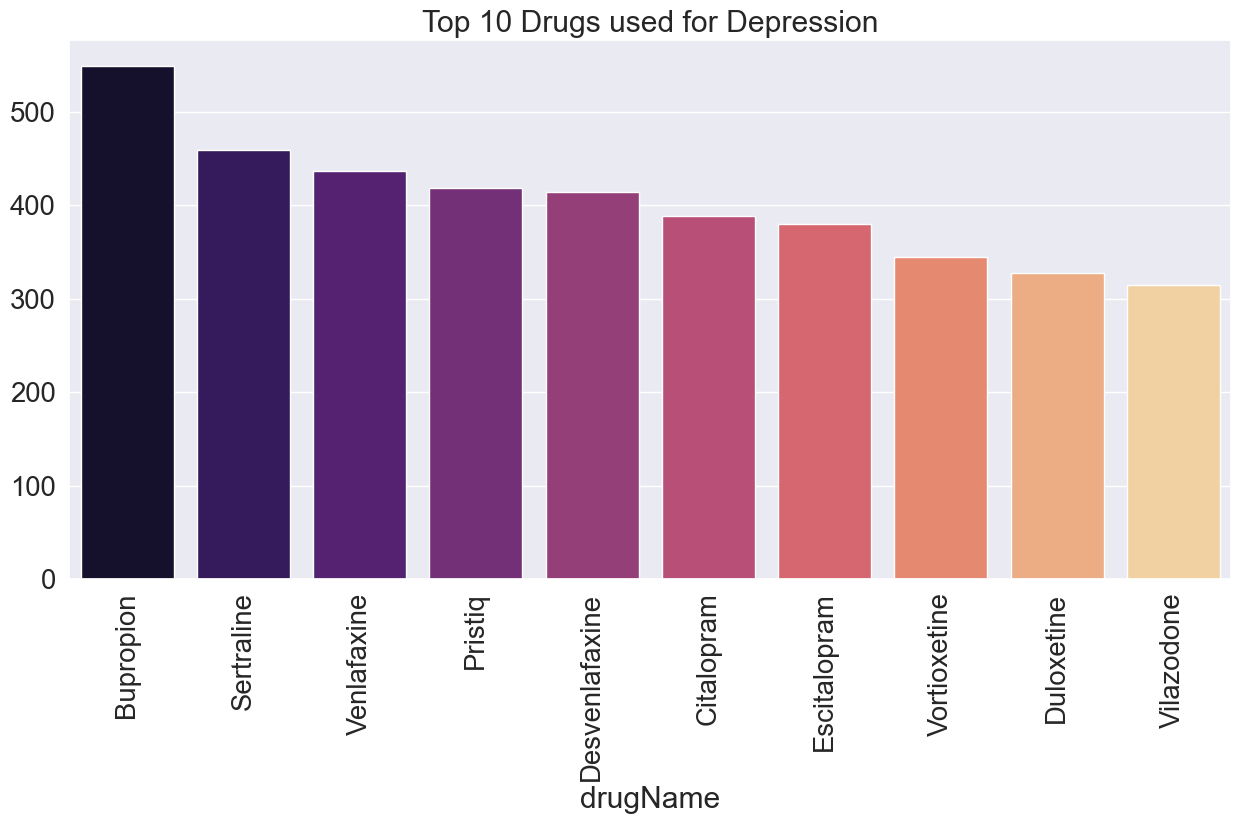

In [8]:
# Filter data for depression
df1 = data[data['condition'] == 'Depression']['drugName'].value_counts().head(10)

# Set seaborn style and font scale
sns.set(font_scale=1.8, style='darkgrid')

plt.figure(figsize=[15, 7])

# Create bar plot
sns.barplot(x=df1.index, y=df1.values, palette='magma')

# Set x-axis label, title, and rotate x-axis labels
plt.title("Top 10 Drugs used for Depression")
plt.xticks(rotation=90) #Rotate x-axis labels for better readability


# Show plot
plt.show()

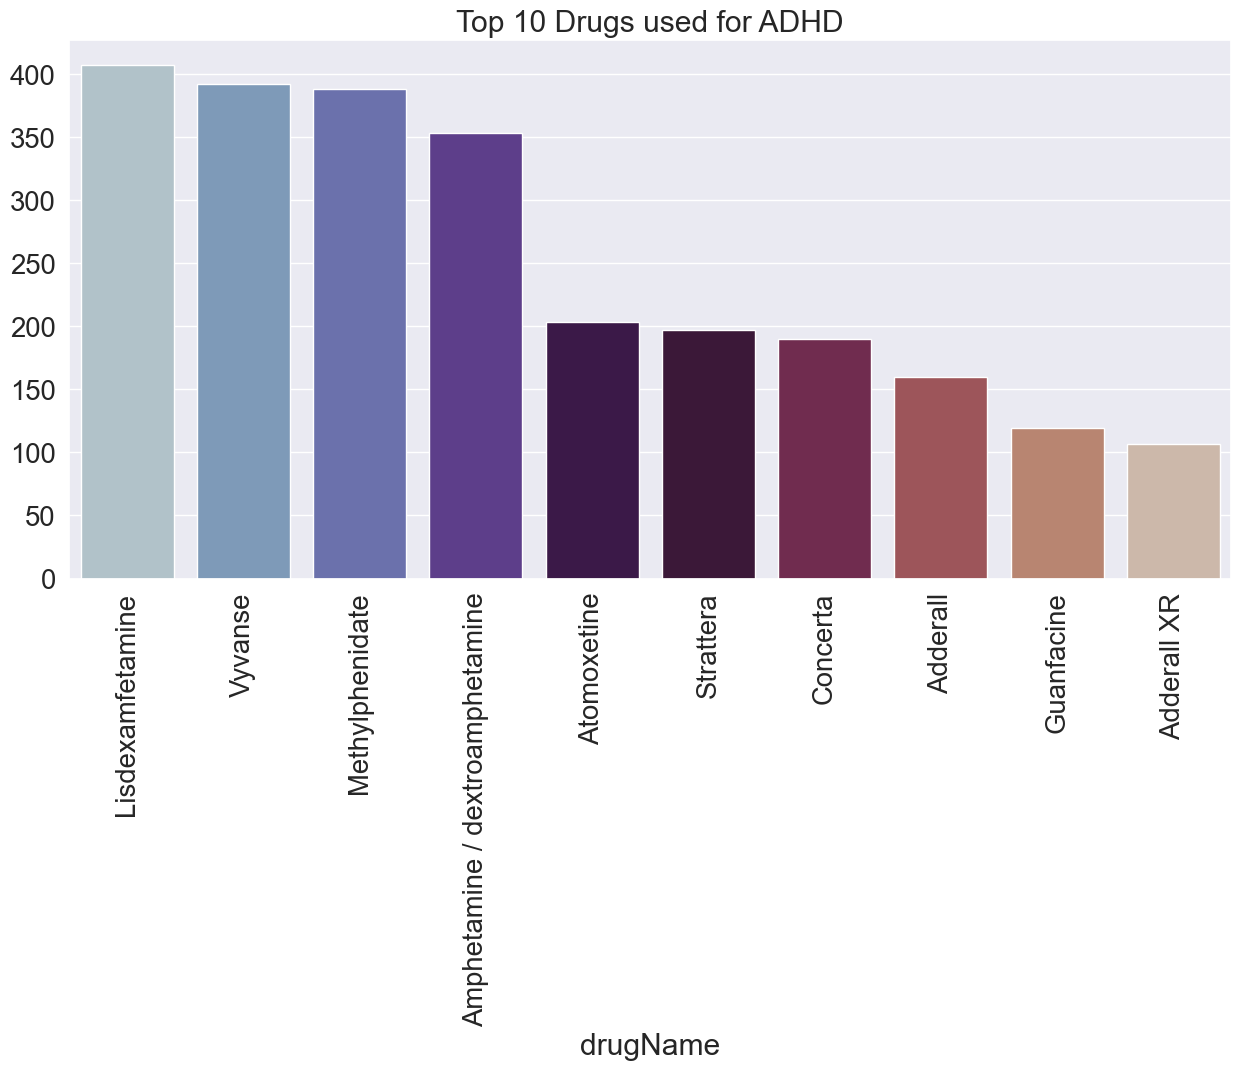

In [9]:
# Filter data for ADHD
df2 = data[data['condition'] == 'ADHD']['drugName'].value_counts().head(10)

# Set seaborn style and font scale
sns.set(font_scale=1.8, style='darkgrid')

plt.figure(figsize=[15, 7])

# Create bar plot
sns.barplot(x=df2.index, y=df2.values, palette='twilight')

# Set x-axis label, title, and rotate x-axis labels
plt.title("Top 10 Drugs used for ADHD")
plt.xticks(rotation=90) #Rotate x-axis labels for better readability


# Show plot
plt.show()

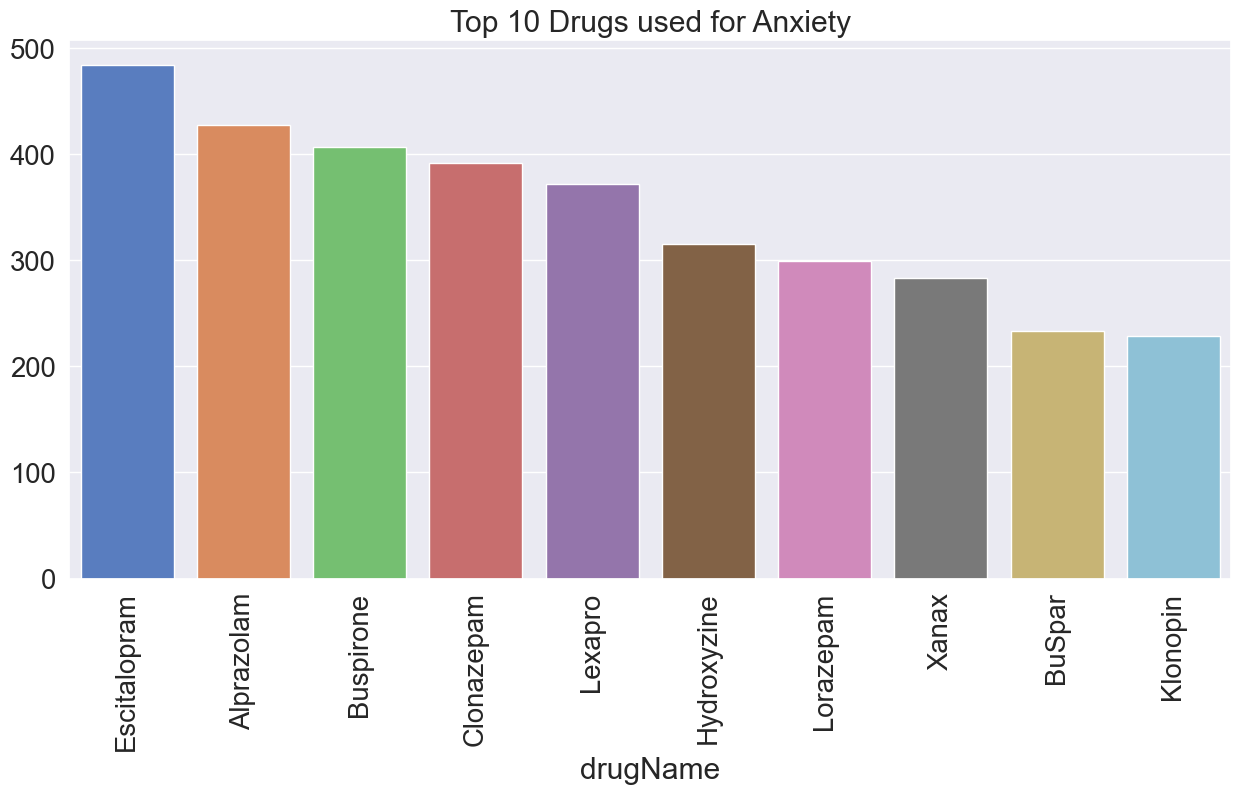

In [10]:
# Filter data for Anxiety
df3 = data[data['condition'] == 'Anxiety']['drugName'].value_counts().head(10)

# Set seaborn style and font scale
sns.set(font_scale=1.8, style='darkgrid')

plt.figure(figsize=[15, 7])

# Create bar plot
sns.barplot(x=df3.index, y=df3.values, palette='muted')

# Set x-axis label, title, and rotate x-axis labels
plt.title("Top 10 Drugs used for Anxiety")
plt.xticks(rotation=90) #Rotate x-axis labels for better readability


# Show plot
plt.show()

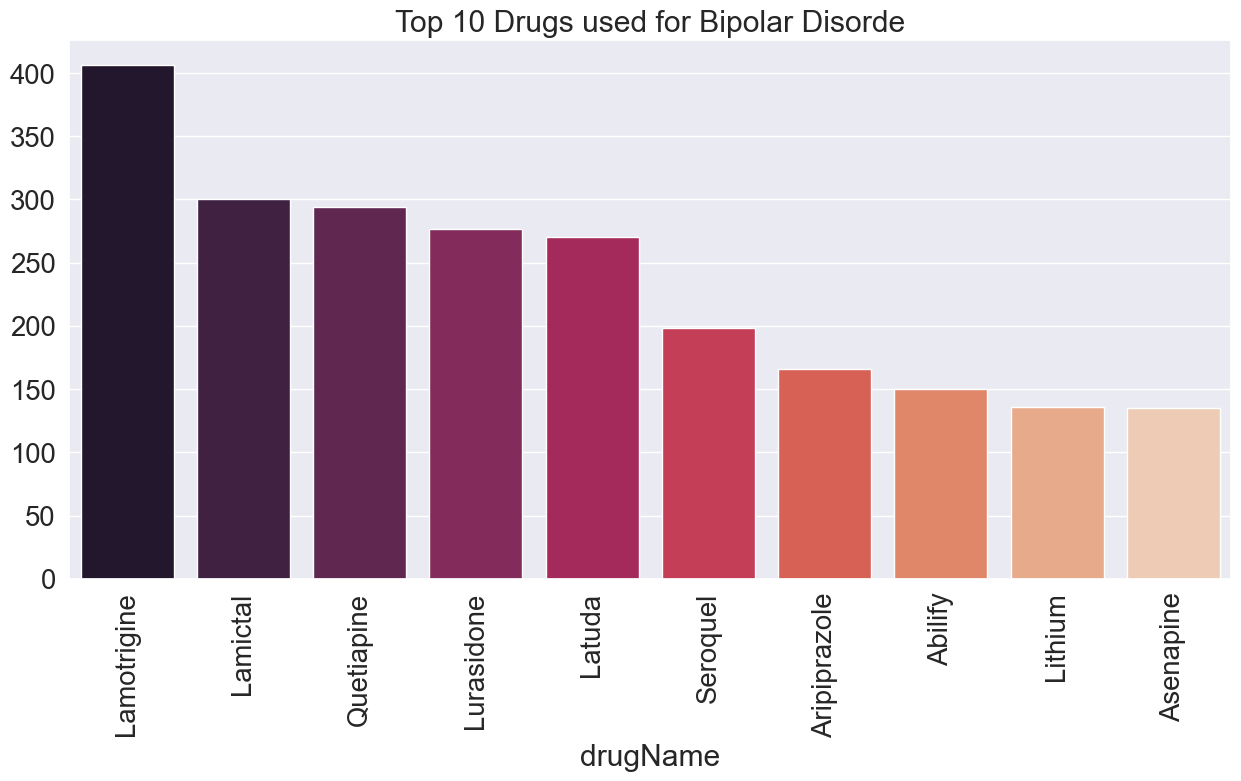

In [11]:
# Filter data for Bipolar Disorde
df4 = data[data['condition'] == 'Bipolar Disorde']['drugName'].value_counts().head(10)

# Set seaborn style and font scale
sns.set(font_scale=1.8, style='darkgrid')

plt.figure(figsize=[15, 7])

# Create bar plot
sns.barplot(x=df4.index, y=df4.values, palette='rocket')

# Set x-axis label, title, and rotate x-axis labels
plt.title("Top 10 Drugs used for Bipolar Disorde")
plt.xticks(rotation=90) #Rotate x-axis labels for better readability


# Show plot
plt.show()

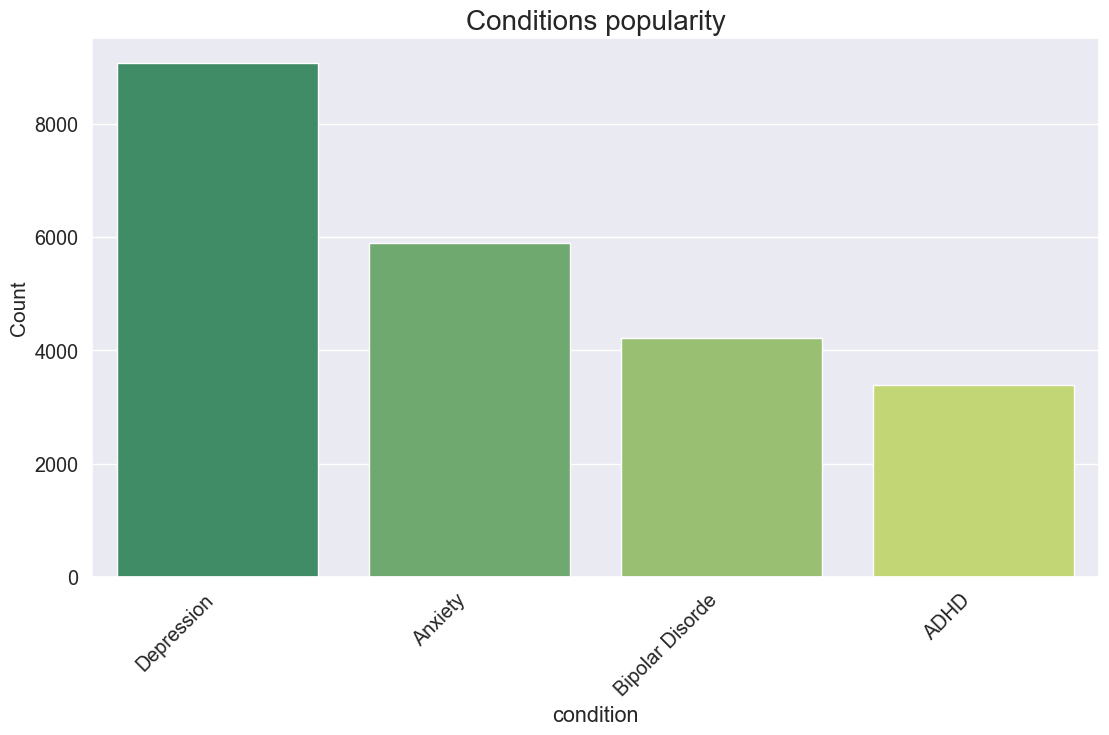

In [12]:
# Count occurrences of each condition
cond_counts = data['condition'].value_counts()

conditions = cond_counts.head(4)

# Set style and font scale
sns.set(style='darkgrid', font_scale=1.3)

# Set plot size
plt.figure(figsize=[13, 7])

# Create bar plot
sns_barplot = sns.barplot(x=conditions.index, y=conditions.values, palette='summer')

# Set title and labels
sns_barplot.set_title("Conditions popularity", fontsize=20)
sns_barplot.set_ylabel("Count", fontsize=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

# Data preprocessing

In [13]:
from textblob import TextBlob
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [14]:
# Preprocessing function for depression reviews
def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Lowercasing
    text = text.lower()
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    tokens = [word.translate(table) for word in tokens]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Drop rows with missing values in 'condition' column
data.dropna(subset=['condition'], inplace=True)

# Preprocess the review column for depression reviews
data['cleaned_review'] = data['review'].apply(preprocess_text)


In [15]:
data

,uniqueID,drugName,condition,review,rating,date,usefulCount,cleaned_review
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,son halfway fourth week intuniv became conce...
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32,abilify changed life hope zoloft clonidine ...
11,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,9-Mar-17,54,taken antidepressant year improvement mostly...
18,212077,Lamotrigine,Bipolar Disorde,"""I&#039;ve been on every medicine under the su...",10,9-Nov-14,18,every medicine sun seems manage hypomania ...
27,78563,Daytrana,ADHD,"""Hi all, My son who is 12 was diagnosed when h...",10,12-Jan-17,11,hi son diagnosed nd grade tried everything ...
...,...,...,...,...,...,...,...,...
161270,183202,Cymbalta,Anxiety,"""I have been taking Cymbalta for 15 months now...",9,10-Jun-13,89,taking cymbalta month first mg six month lat...
161276,176146,Lorazepam,Anxiety,"""About 4 years ago I started having early-morn...",8,21-Nov-17,0,year ago started earlymorning awakeninginsomn...
161283,228492,Geodon,Bipolar Disorde,"""I was in a very bad place at the time I start...",3,25-Jul-16,5,bad place time started taking doctor wanted ...
161286,93069,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2,17-Jul-16,33,third med tried anxiety mild depression week...


In [16]:
# Perform sentiment analysis on cleaned depression reviews
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment'] = data['cleaned_review'].apply(get_sentiment)

In [17]:
data

,uniqueID,drugName,condition,review,rating,date,usefulCount,cleaned_review,sentiment
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,son halfway fourth week intuniv became conce...,Positive
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32,abilify changed life hope zoloft clonidine ...,Positive
11,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,9-Mar-17,54,taken antidepressant year improvement mostly...,Positive
18,212077,Lamotrigine,Bipolar Disorde,"""I&#039;ve been on every medicine under the su...",10,9-Nov-14,18,every medicine sun seems manage hypomania ...,Positive
27,78563,Daytrana,ADHD,"""Hi all, My son who is 12 was diagnosed when h...",10,12-Jan-17,11,hi son diagnosed nd grade tried everything ...,Positive
...,...,...,...,...,...,...,...,...,...
161270,183202,Cymbalta,Anxiety,"""I have been taking Cymbalta for 15 months now...",9,10-Jun-13,89,taking cymbalta month first mg six month lat...,Negative
161276,176146,Lorazepam,Anxiety,"""About 4 years ago I started having early-morn...",8,21-Nov-17,0,year ago started earlymorning awakeninginsomn...,Positive
161283,228492,Geodon,Bipolar Disorde,"""I was in a very bad place at the time I start...",3,25-Jul-16,5,bad place time started taking doctor wanted ...,Negative
161286,93069,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2,17-Jul-16,33,third med tried anxiety mild depression week...,Negative


In [18]:
# Calculate percentage of positive, negative, and neutral reviews for each drug
sentiment_percentage = data.groupby(['drugName', 'sentiment']).size().unstack(fill_value=0)
sentiment_percentage['Total'] = sentiment_percentage.sum(axis=1)
sentiment_percentage['Positive (%)'] = (sentiment_percentage['Positive'] / sentiment_percentage['Total']) * 100
sentiment_percentage['Negative (%)'] = (sentiment_percentage['Negative'] / sentiment_percentage['Total']) * 100
sentiment_percentage['Neutral (%)'] = (sentiment_percentage['Neutral'] / sentiment_percentage['Total']) * 100


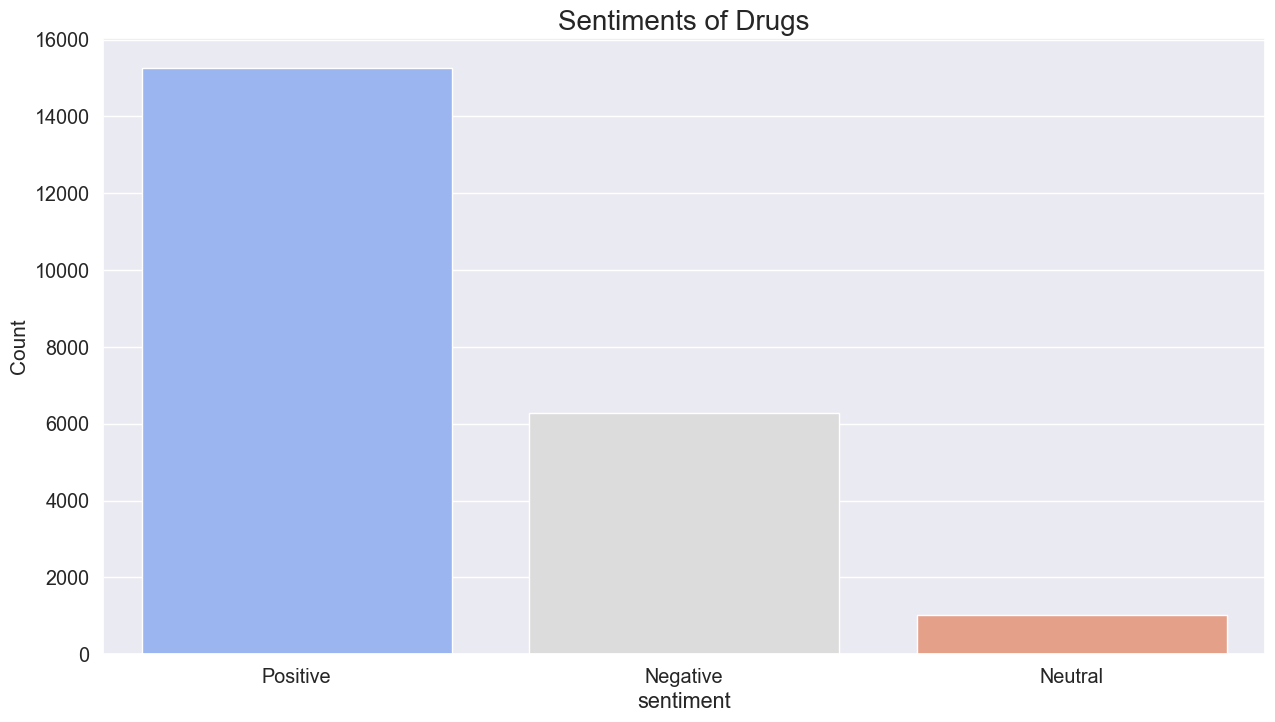

In [19]:
# Set the figure size
plt.figure(figsize=(15, 8))

# Plot the sentiment analysis using seaborn countplot
sns.countplot(data=data, x='sentiment', palette='coolwarm')

# Set the title and labels
plt.title('Sentiments of Drugs', fontsize=20)
plt.ylabel('Count', fontsize=15)

# Show the plot
plt.show()


<Figure size 1300x700 with 0 Axes>

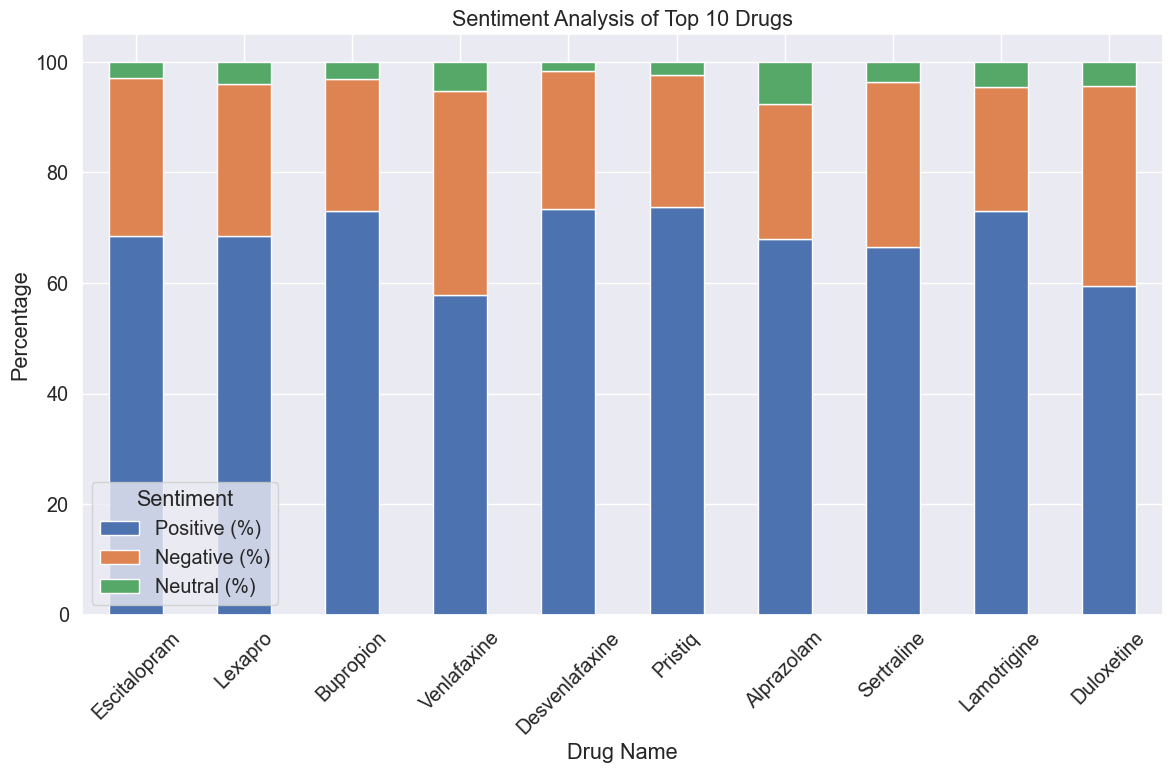

In [20]:
# Plotting top ten 
top_drugs = sentiment_percentage.sort_values(by='Total', ascending=False).head(10)

# Set plot size
plt.figure(figsize=[13, 7])

# Plot stacked bar chart
top_drugs[['Positive (%)', 'Negative (%)', 'Neutral (%)']].plot(kind='bar', stacked=True)

# Set title and labels
plt.title('Sentiment Analysis of Top 10 Drugs')
plt.xlabel('Drug Name')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Get legend
legend = plt.legend(title='Sentiment')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [21]:
# Conclusion
best_drug = sentiment_percentage['Positive (%)'].idxmax()
print(f"The Drug with most positive sentiments: {best_drug}")

The Drug with most positive sentiments: Abilify Discmelt


Model 1

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_review'],data['sentiment'], test_size=0.2, random_state=42)

# Extract features from the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = svm_classifier.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.88      0.75      0.81      1232
     Neutral       0.84      0.62      0.72       206
    Positive       0.89      0.96      0.93      3078

    accuracy                           0.89      4516
   macro avg       0.87      0.78      0.82      4516
weighted avg       0.89      0.89      0.89      4516



In [23]:
# Convert the single text input into TF-IDF features
X_future = 'very good'
X_future_tfidf = tfidf_vectorizer.transform([X_future])

# Predict sentiment using the trained model
y_future_pred = svm_classifier.predict(X_future_tfidf)

print("Predicted sentiment for the input '{}' is '{}'".format(X_future, y_future_pred))

Predicted sentiment for the input 'very good' is '['Positive']'


In [24]:
# Convert the single text input into TF-IDF features
X_future = 'it is bad'
X_future_tfidf = tfidf_vectorizer.transform([X_future])

# Predict sentiment using the trained model
y_future_pred = svm_classifier.predict(X_future_tfidf)

print("Predicted sentiment for the input '{}' is '{}'".format(X_future, y_future_pred))

Predicted sentiment for the input 'it is bad' is '['Negative']'


In [25]:
!pip install joblib

In [26]:
import joblib

# Save the trained SVM classifier model to a file
joblib.dump(svm_classifier, 'svm_classifier_model.pkl')

['svm_classifier_model.pkl']

Model 2

In [27]:
# Calculate maximum percentage and corresponding sentiment for each drug
sentiment_percentage['Max (%)'] = sentiment_percentage[['Positive (%)', 'Negative (%)', 'Neutral (%)']].max(axis=1)
sentiment_percentage['Max Sentiment'] = sentiment_percentage[['Positive (%)', 'Negative (%)', 'Neutral (%)']].idxmax(axis=1)

In [28]:
sentiment_percentage['Max (%)']

drugName
Abilify              65.410959
Abilify Discmelt    100.000000
Adderall             68.125000
Adderall XR          73.831776
Adzenys XR-ODT       83.333333
                       ...    
Zetran              100.000000
Ziprasidone          48.672566
Zoloft               68.858131
Zyprexa              60.606061
Zyprexa Zydis        60.000000
Name: Max (%), Length: 224, dtype: float64

In [29]:
# Remove "(%)" from the strings in the "Max Sentiment" column
sentiment_percentage['Max Sentiment'] = sentiment_percentage['Max Sentiment'].str.replace(' \(%\)', '', regex=True)

In [30]:
sentiment_percentage['Max Sentiment']

drugName
Abilify             Positive
Abilify Discmelt    Positive
Adderall            Positive
Adderall XR         Positive
Adzenys XR-ODT      Positive
                      ...   
Zetran               Neutral
Ziprasidone         Positive
Zoloft              Positive
Zyprexa             Positive
Zyprexa Zydis       Positive
Name: Max Sentiment, Length: 224, dtype: object

In [31]:
# Reset the index to move 'drugName' from the index to a regular column
sentiment_percentage.reset_index(inplace=True)

print(sentiment_percentage.columns)


Index(['drugName', 'Negative', 'Neutral', 'Positive', 'Total', 'Positive (%)',
       'Negative (%)', 'Neutral (%)', 'Max (%)', 'Max Sentiment'],
      dtype='object', name='sentiment')


In [32]:
print(sentiment_percentage.head().to_string())

sentiment          drugName  Negative  Neutral  Positive  Total  Positive (%)  Negative (%)  Neutral (%)     Max (%) Max Sentiment
0                   Abilify        78       23       191    292     65.410959     26.712329     7.876712   65.410959      Positive
1          Abilify Discmelt         0        0         1      1    100.000000      0.000000     0.000000  100.000000      Positive
2                  Adderall        36       15       109    160     68.125000     22.500000     9.375000   68.125000      Positive
3               Adderall XR        24        4        79    107     73.831776     22.429907     3.738318   73.831776      Positive
4            Adzenys XR-ODT         3        0        15     18     83.333333     16.666667     0.000000   83.333333      Positive


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report


X = sentiment_percentage['drugName']
y = sentiment_percentage['Max Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Extract features from the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Support Vector Machine (SVM) classifier
svm_classifier2 = SVC(kernel='linear')
svm_classifier2.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = svm_classifier2.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         2
    Positive       0.96      1.00      0.98        43

    accuracy                           0.96        45
   macro avg       0.48      0.50      0.49        45
weighted avg       0.91      0.96      0.93        45



In [34]:
# predict

# 1. Prepare the test data for Xanax
Xanax_X_test = ['Xanax']  # Convert the input into a list of strings

# 2. Preprocess the test data for Xanax
Xanax_X_test_tfidf = tfidf_vectorizer.transform(Xanax_X_test)

# 3. Predict for Xanax
Xanax_y_pred = svm_classifier2.predict(Xanax_X_test_tfidf)

# 4. Print the predicted sentiment for Xanax
print("Predicted sentiment for the drug 'Xanax' is:", Xanax_y_pred[0])


Predicted sentiment for the drug 'Xanax' is: Positive


In [35]:
# predict 2


Oleptro_X_test = ['Oleptro']  # Convert the input into a list of strings

# 2. Preprocess the test data for Xanax
Oleptro_X_test_tfidf = tfidf_vectorizer.transform(Oleptro_X_test)

# 3. Predict for Xanax
Oleptro_y_pred = svm_classifier2.predict(Oleptro_X_test_tfidf)

# 4. Print the predicted sentiment for Xanax
print("Predicted sentiment for the drug 'Oleptro' is:", Oleptro_y_pred[0])


Predicted sentiment for the drug 'Oleptro' is: Negative


In [36]:
positive_drug = sentiment_percentage.loc[sentiment_percentage['Max Sentiment'] == 'Positive', ['drugName', 'Max Sentiment','Max (%)']]
print(positive_drug)


sentiment          drugName Max Sentiment     Max (%)
0                   Abilify      Positive   65.410959
1          Abilify Discmelt      Positive  100.000000
2                  Adderall      Positive   68.125000
3               Adderall XR      Positive   73.831776
4            Adzenys XR-ODT      Positive   83.333333
..                      ...           ...         ...
218                 Zenzedi      Positive   50.000000
220             Ziprasidone      Positive   48.672566
221                  Zoloft      Positive   68.858131
222                 Zyprexa      Positive   60.606061
223           Zyprexa Zydis      Positive   60.000000

[209 rows x 3 columns]


In [37]:
negative_drug = sentiment_percentage.loc[sentiment_percentage['Max Sentiment'] == 'Negative', ['drugName', 'Max Sentiment','Max (%)']]
print(negative_drug)

sentiment            drugName Max Sentiment     Max (%)
32                  Carbatrol      Negative  100.000000
60                   Dilantin      Negative  100.000000
75                     Fanapt      Negative  100.000000
86                Iloperidone      Negative   55.555556
108                  Lithobid      Negative   50.000000
110        Lorazepam Intensol      Negative  100.000000
127                   Nadolol      Negative  100.000000
137                   Oleptro      Negative   66.666667
186                     Tenex      Negative  100.000000
201                Tryptophan      Negative  100.000000
204                   Vanspar      Negative  100.000000


In [38]:
# predict 1


X1_test = ['Xanax']  # Convert the input into a list of strings

#  Preprocess the test data for Xanax
X1_test_tfidf = tfidf_vectorizer.transform(X1_test)

#  Predict for Xanax
y1_pred = svm_classifier2.predict(X1_test_tfidf)

#  Get the corresponding Max (%) value for Xanax
max1_percent = round(sentiment_percentage.loc[sentiment_percentage['drugName'] == X1_test[0], 'Max (%)'].values[0], 2)


print("the effect of the drug 'Xanax' is:", y1_pred[0])
print("of effectiveness percent:", max1_percent)

the effect of the drug 'Xanax' is: Positive
of effectiveness percent: 67.38


In [39]:
# predict 2

X2_test = ['Oleptro']  # Convert the input into a list of strings

 # Preprocess the test data 
X2_test_tfidf = tfidf_vectorizer.transform(X2_test)


y2_pred = svm_classifier2.predict(X2_test_tfidf)

# Get the corresponding Max (%) value 
max2_percent = round(sentiment_percentage.loc[sentiment_percentage['drugName'] == X2_test[0], 'Max (%)'].values[0], 2)


print("the effect of the drug 'Oleptro' is:", y2_pred[0])
print("of effectiveness percent:", max2_percent)

the effect of the drug 'Oleptro' is: Negative
of effectiveness percent: 66.67


In [40]:
# predict

X3_test = ['Serzone']  # Convert the input into a list of strings

 # Preprocess the test data 
X3_test_tfidf = tfidf_vectorizer.transform(X3_test)


y3_pred = svm_classifier2.predict(X3_test_tfidf)

# Get the corresponding Max (%) value 
max3_percent = round(sentiment_percentage.loc[sentiment_percentage['drugName'] == X3_test[0], 'Max (%)'].values[0], 2)


print("the effect of the drug 'Serzone' is:", y3_pred[0])
print("of effectiveness percent:", max3_percent)

the effect of the drug 'Serzone' is: Positive
of effectiveness percent: 50.0


In [41]:
# Save the trained model
joblib.dump(svm_classifier, 'svm_classifier_model_2.pkl')

['svm_classifier_model_2.pkl']

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Function to calculate sentiment scores using TextBlob
def calculate_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Sample review text for testing
sample_review = "This drug is so amazing!"

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_review'], data['rating'], test_size=0.2, random_state=42)

# Adding sample review to the test data
X_test = X_test.reset_index(drop=True)
X_test.loc[len(X_test)] = sample_review
y_test = y_test.reset_index(drop=True)
y_test.loc[len(y_test)] = None  # Placeholder value for the sample review

# Calculate sentiment scores for the reviews in the testing set
X_test_sentiment = pd.DataFrame(X_test[:-1].tolist(), columns=['review_text'])
X_test_sentiment['sentiment_polarity'], X_test_sentiment['sentiment_subjectivity'] = zip(*X_test_sentiment['review_text'].apply(calculate_sentiment))

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test_sentiment['review_text'])

# Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_tfidf, y_train)

# Predicting ratings
y_pred = model.predict(X_test_tfidf)  

# Adjust predictions based on sentiment polarity
y_pred_adjusted = y_pred + (y_pred * X_test_sentiment['sentiment_polarity'])

# Clip predictions to ensure they are within the valid range of 0 to 10
y_pred_adjusted_clipped = np.clip(y_pred_adjusted, 0, 10)

In [43]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test[:-1], y_pred_adjusted_clipped)
print(f"Mean Absolute Error: {mae}")

sample_review = "This drug is so effective"
# Predict rating for the sample review
sample_review_sentiment = calculate_sentiment(sample_review)
sample_review_tfidf = tfidf_vectorizer.transform([sample_review])
sample_review_pred = model.predict(sample_review_tfidf)
sample_review_pred_adjusted = sample_review_pred + (sample_review_pred * sample_review_sentiment[0])  # Adjust based on sentiment
sample_review_pred_adjusted_clipped = np.clip(sample_review_pred_adjusted, 0, 10)  
sample_review_pred_rounded = np.round(sample_review_pred_adjusted_clipped)  # Rounding the adjusted predicted rating
print(f"Predicted Rounded Rating for the Sample Review: {sample_review_pred_rounded[0]}")

Mean Absolute Error: 1.5222761333093453
Predicted Rounded Rating for the Sample Review: 10.0


In [45]:
# Sample review text for testing
sample_review = "This drug is terrible"
# Predict rating for the sample review
sample_review_sentiment = calculate_sentiment(sample_review)
sample_review_tfidf = tfidf_vectorizer.transform([sample_review])
sample_review_pred = model.predict(sample_review_tfidf)
sample_review_pred_adjusted = sample_review_pred + (sample_review_pred * sample_review_sentiment[0])  # Adjust based on sentiment
sample_review_pred_adjusted_clipped = np.clip(sample_review_pred_adjusted, 0, 10)  # Clip to valid range
sample_review_pred_rounded = np.round(sample_review_pred_adjusted_clipped)  # Rounding the adjusted predicted rating
print(f"Predicted Rounded Rating for the Sample Review: {sample_review_pred_rounded[0]}")

Predicted Rounded Rating for the Sample Review: 0.0


In [46]:
# Sample review text for testing
sample_review = "This drug is not bad actully it works good for me "
# Predict rating for the sample review
sample_review_sentiment = calculate_sentiment(sample_review)
sample_review_tfidf = tfidf_vectorizer.transform([sample_review])
sample_review_pred = model.predict(sample_review_tfidf)
sample_review_pred_adjusted = sample_review_pred + (sample_review_pred * sample_review_sentiment[0])  # Adjust based on sentiment
sample_review_pred_adjusted_clipped = np.clip(sample_review_pred_adjusted, 0, 10)  # Clip to valid range
sample_review_pred_rounded = np.round(sample_review_pred_adjusted_clipped)  # Rounding the adjusted predicted rating
print(f"Predicted Rounded Rating for the Sample Review: {sample_review_pred_rounded[0]}")

Predicted Rounded Rating for the Sample Review: 8.0
